#1. Perform EDA on the Dataset and draw the insights.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'Customer Data.csv'
data = pd.read_csv(file_path)

In [ ]:
# Display the first few rows of the dataset
print(data.head())

# Display basic information about the dataset
print(data.info())

# Check for the number of rows and columns
print(data.shape)


  CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000       

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64


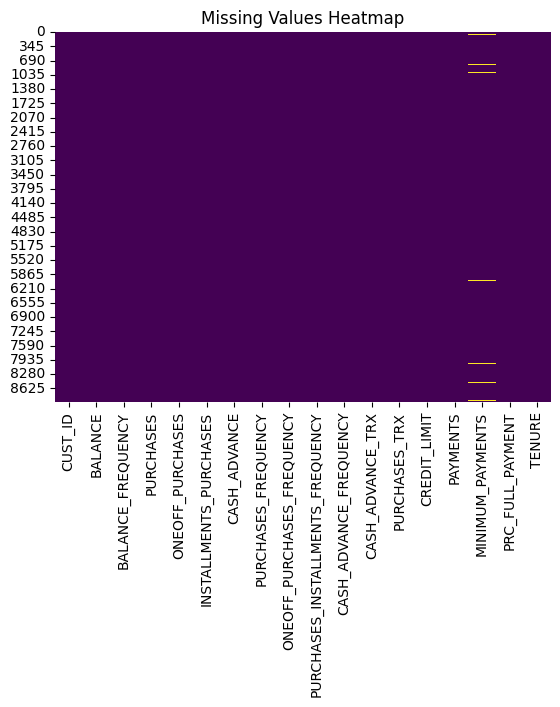

In [ ]:
# Check for missing values
missing_values = data.isnull().sum()
print(missing_values)

# Visualize missing values
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


In [ ]:
# Display basic statistics
print(data.describe())

# Summary statistics for categorical variables (if any)
categorical_columns = data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f'Summary statistics for {col}:')
    print(data[col].value_counts())


            BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000

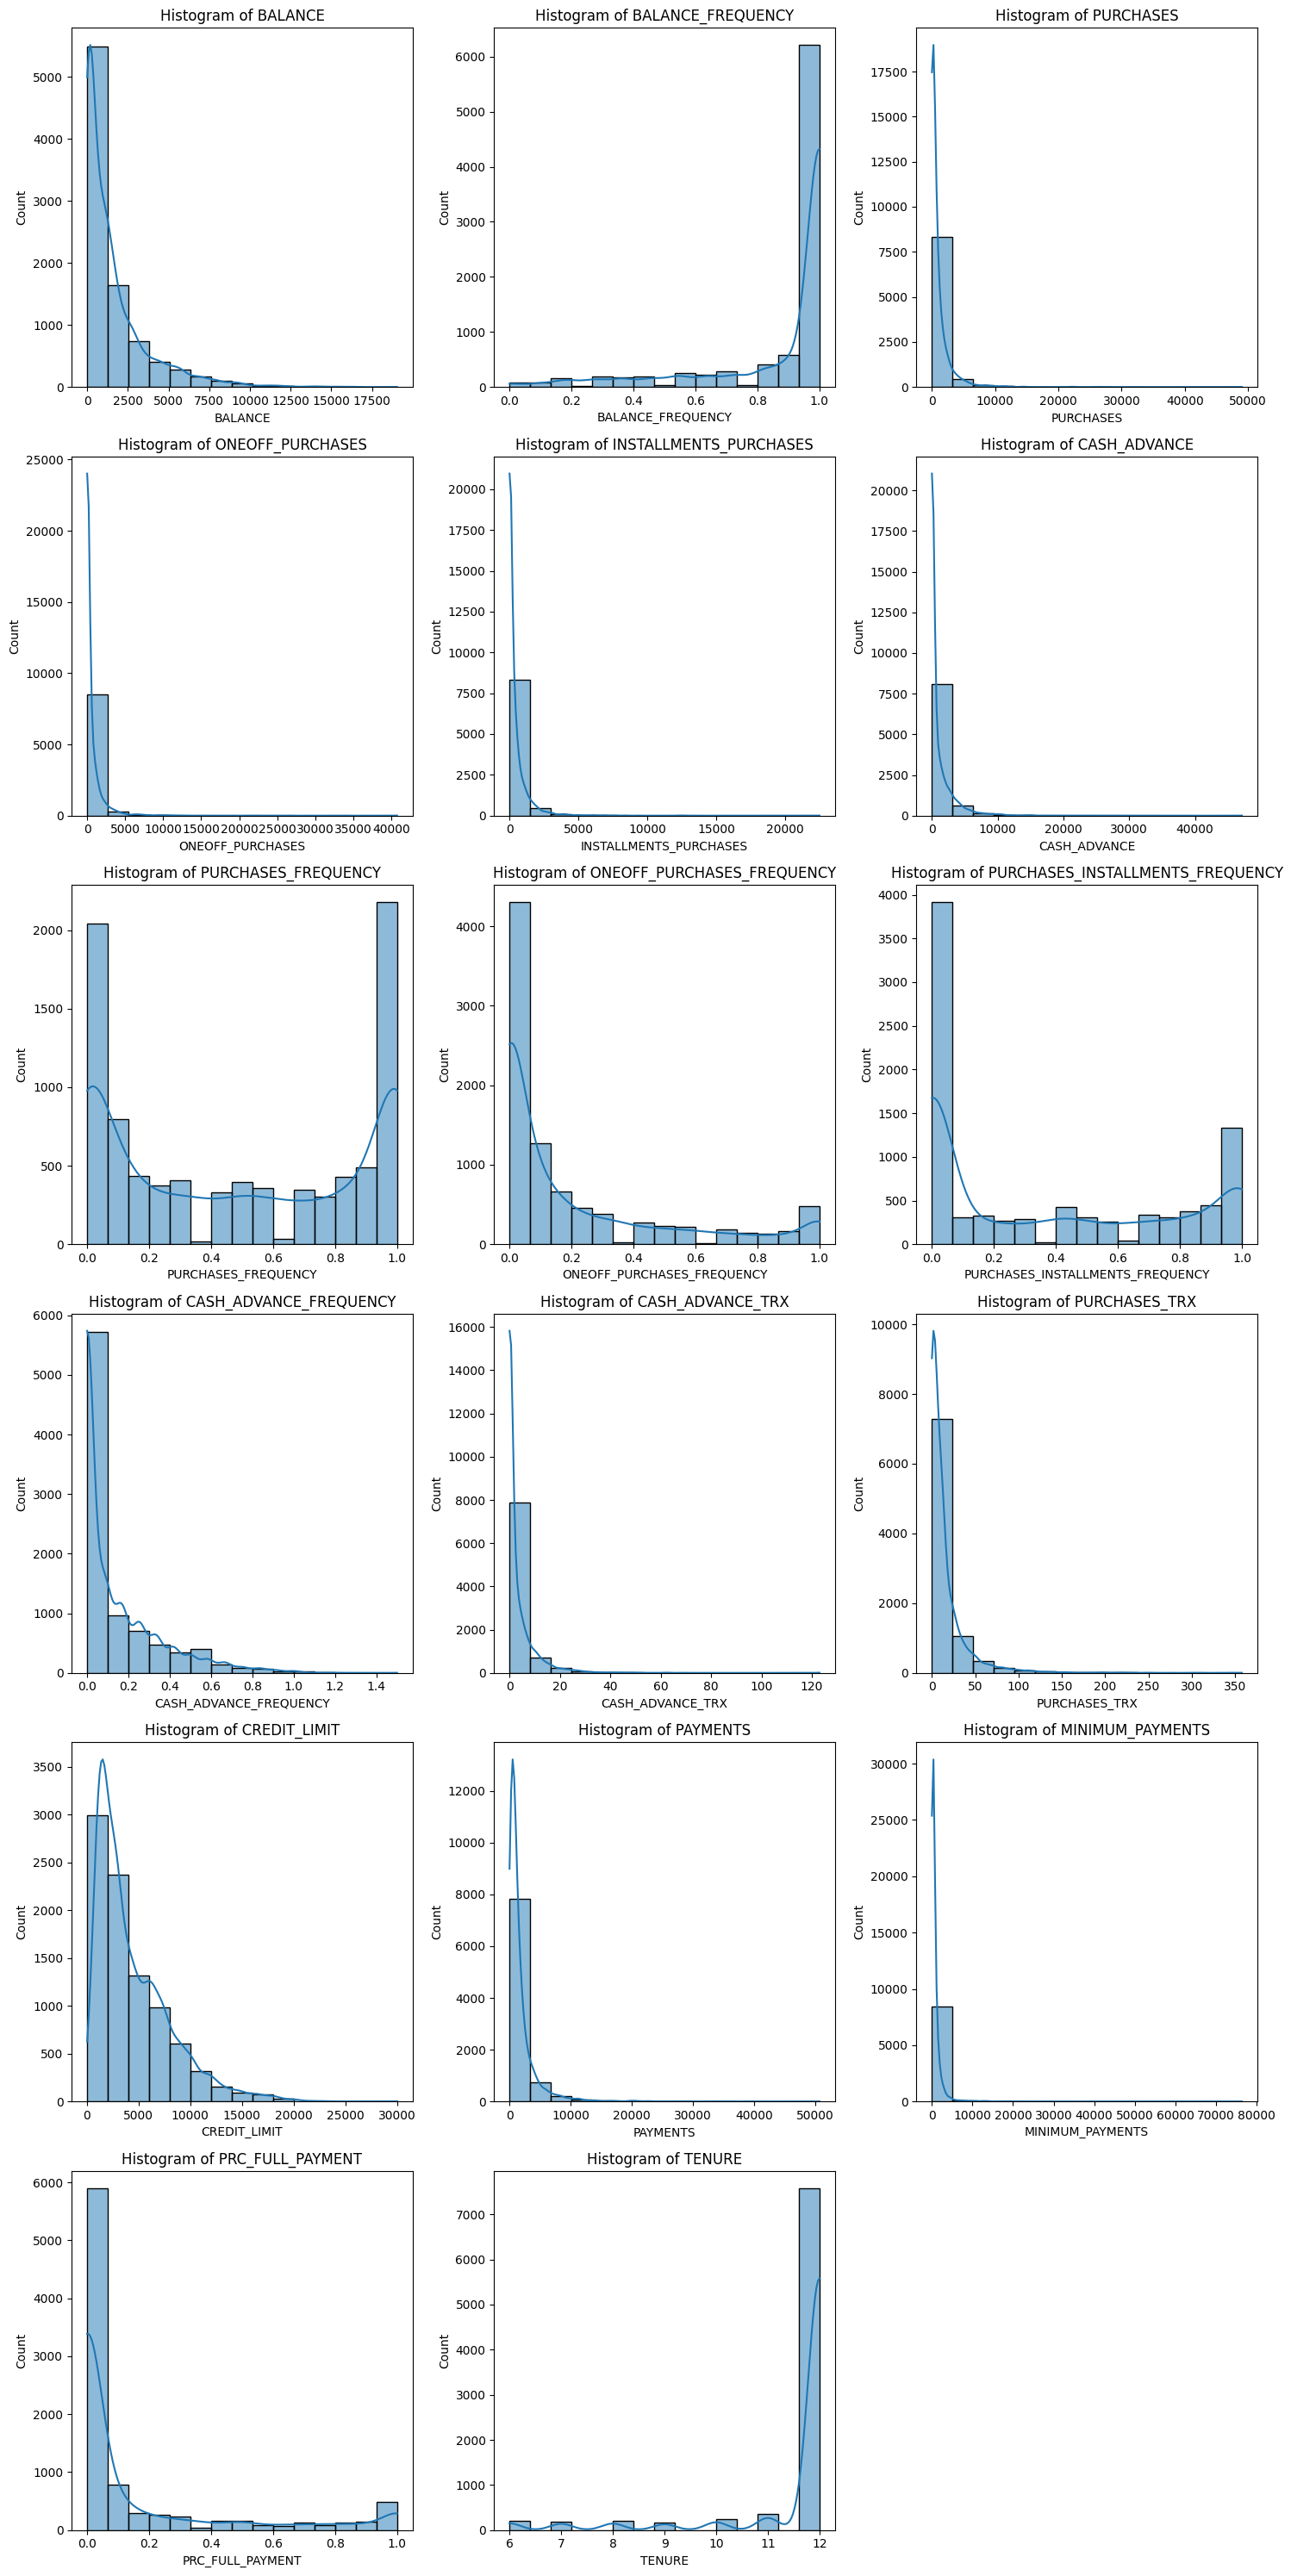

In [ ]:
# Plot histograms for numerical variables individually
numerical_columns = data.select_dtypes(include=[np.number]).columns

# Determine the number of rows and columns for the subplot grid
n_cols = 3
n_rows = int(np.ceil(len(numerical_columns) / n_cols))

plt.figure(figsize=(15, n_rows * 5))
for i, col in enumerate(numerical_columns):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(data[col], bins=15, kde=True)
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()



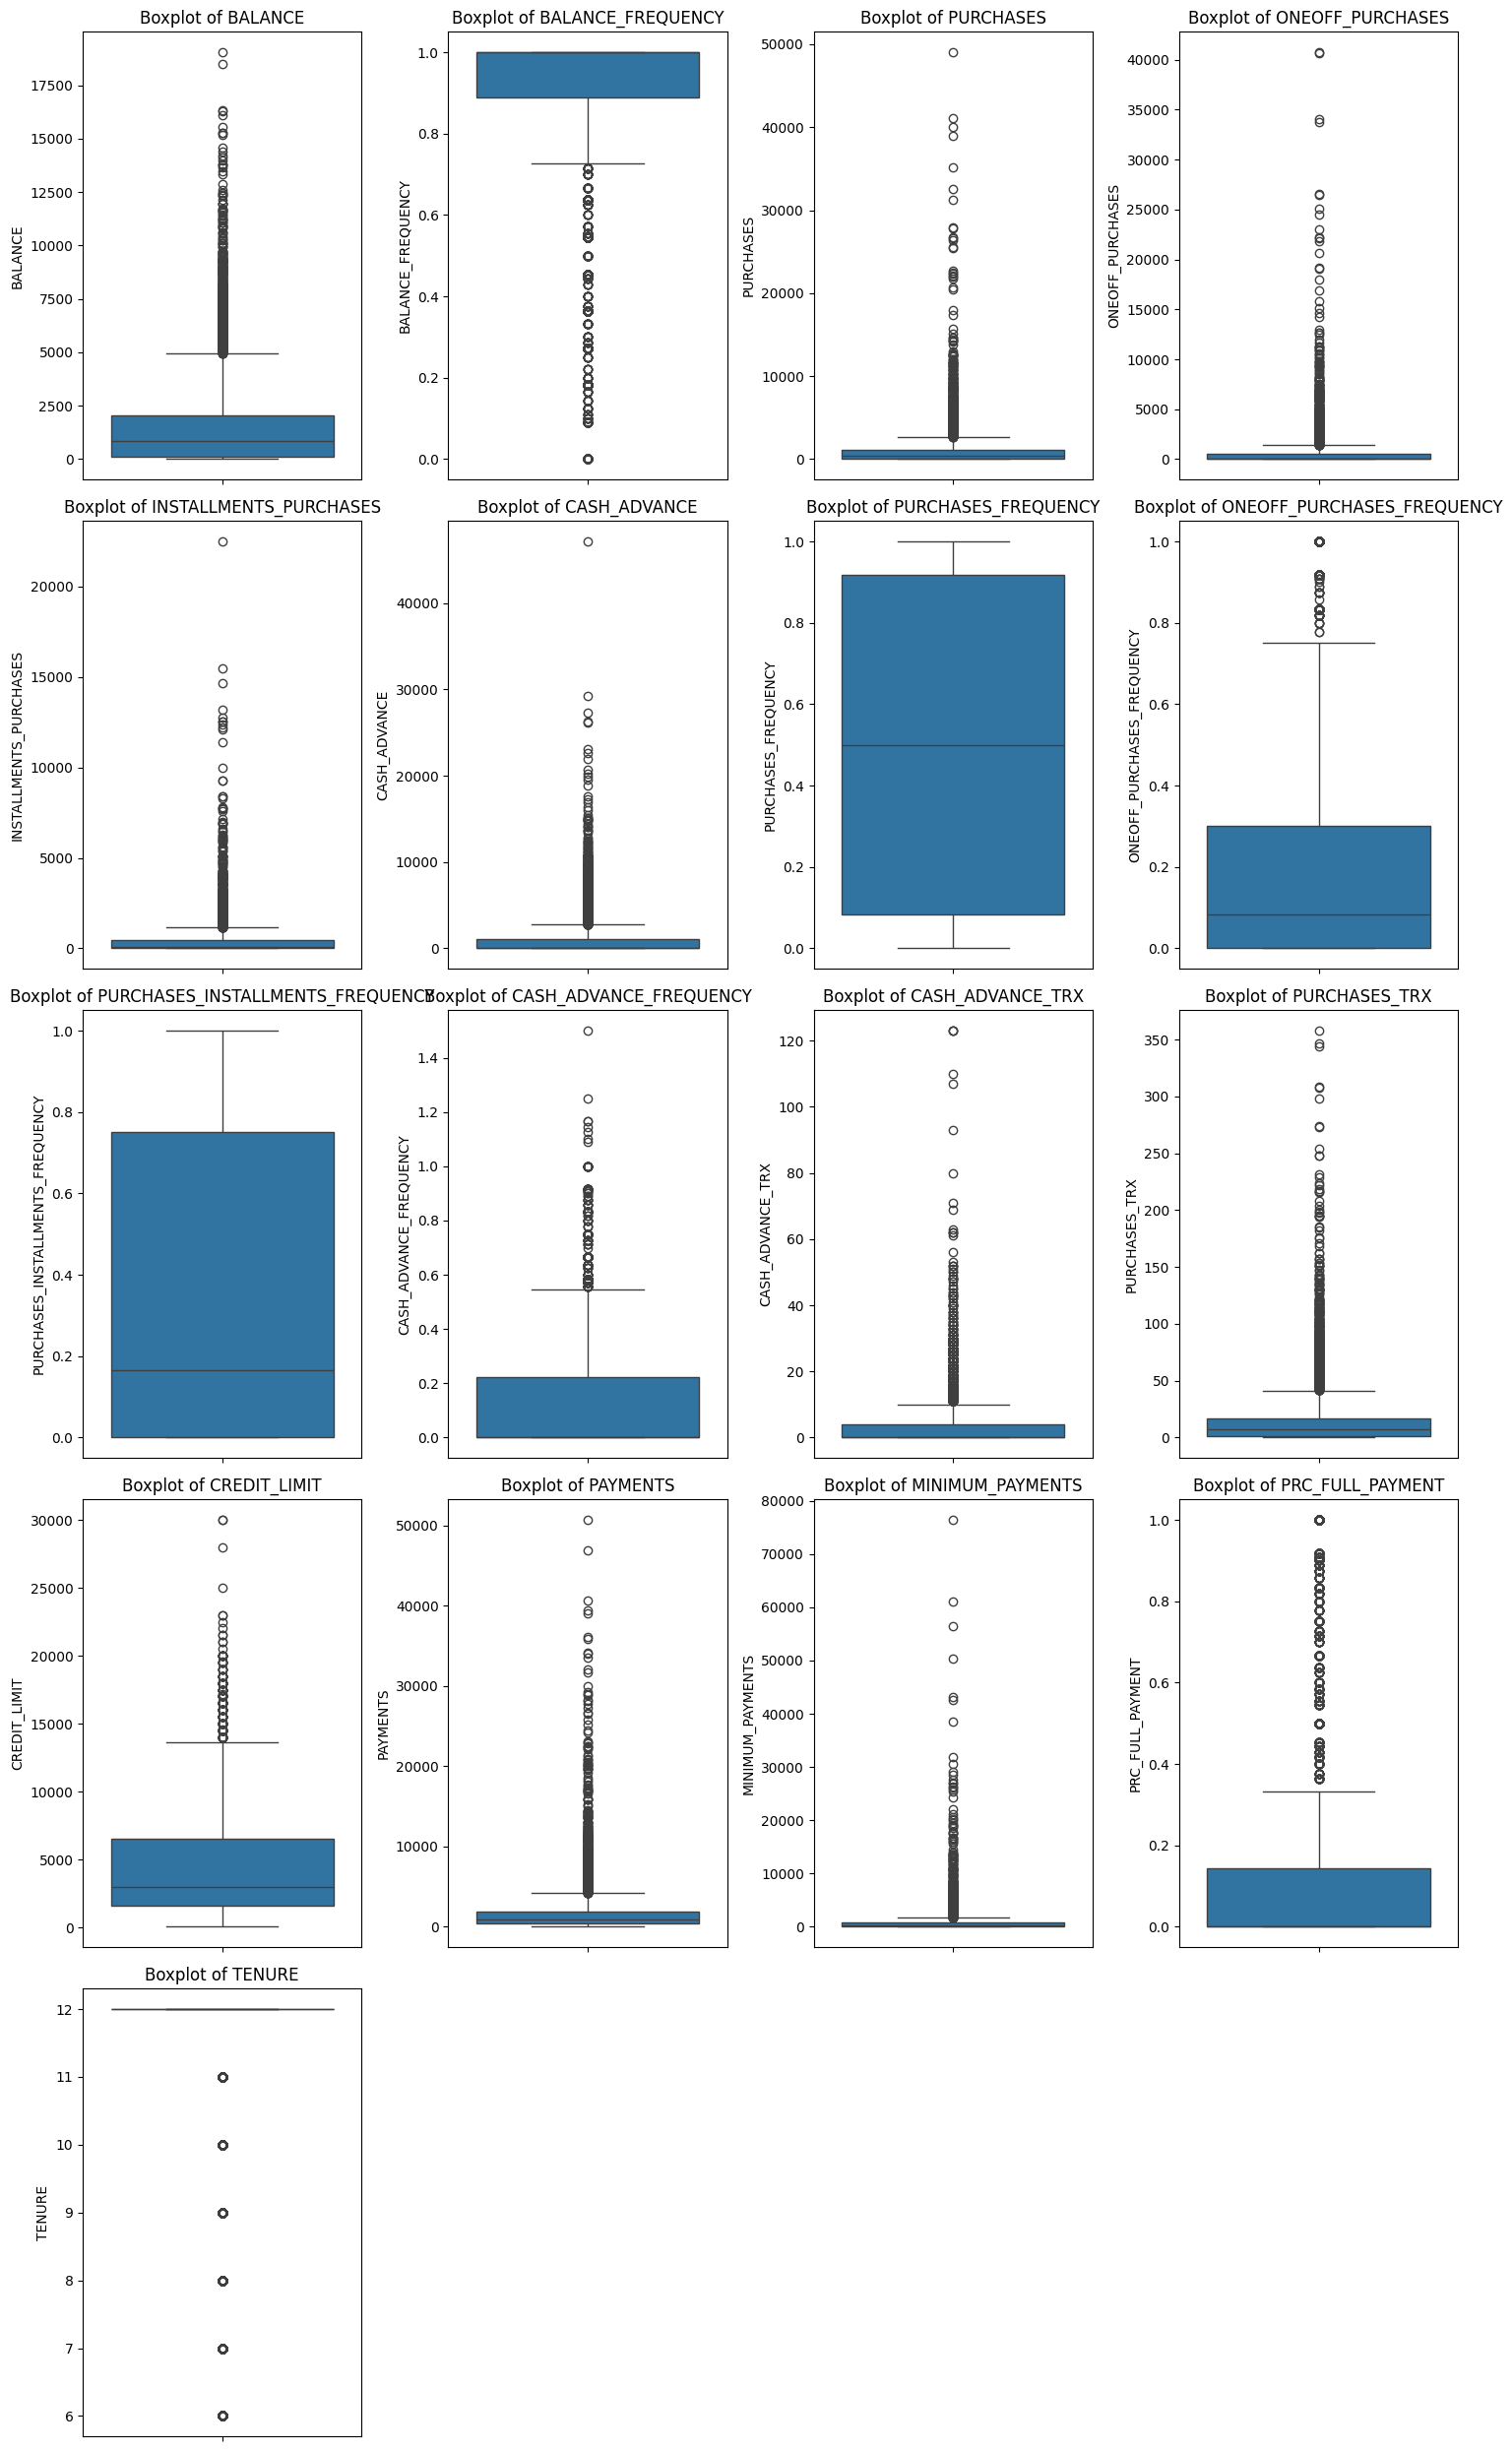

In [ ]:
# Determine the number of rows and columns for the subplot grid
n_cols = 4  # Adjusted to fit the number of plots
n_rows = int(np.ceil(len(numerical_columns) / n_cols))

plt.figure(figsize=(15, n_rows * 5))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(data[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


                                   BALANCE  BALANCE_FREQUENCY  PURCHASES  \
BALANCE                           1.000000           0.322412   0.181261   
BALANCE_FREQUENCY                 0.322412           1.000000   0.133674   
PURCHASES                         0.181261           0.133674   1.000000   
ONEOFF_PURCHASES                  0.164350           0.104323   0.916845   
INSTALLMENTS_PURCHASES            0.126469           0.124292   0.679896   
CASH_ADVANCE                      0.496692           0.099388  -0.051474   
PURCHASES_FREQUENCY              -0.077944           0.229715   0.393017   
ONEOFF_PURCHASES_FREQUENCY        0.073166           0.202415   0.498430   
PURCHASES_INSTALLMENTS_FREQUENCY -0.063186           0.176079   0.315567   
CASH_ADVANCE_FREQUENCY            0.449218           0.191873  -0.120143   
CASH_ADVANCE_TRX                  0.385152           0.141555  -0.067175   
PURCHASES_TRX                     0.154338           0.189626   0.689561   
CREDIT_LIMIT

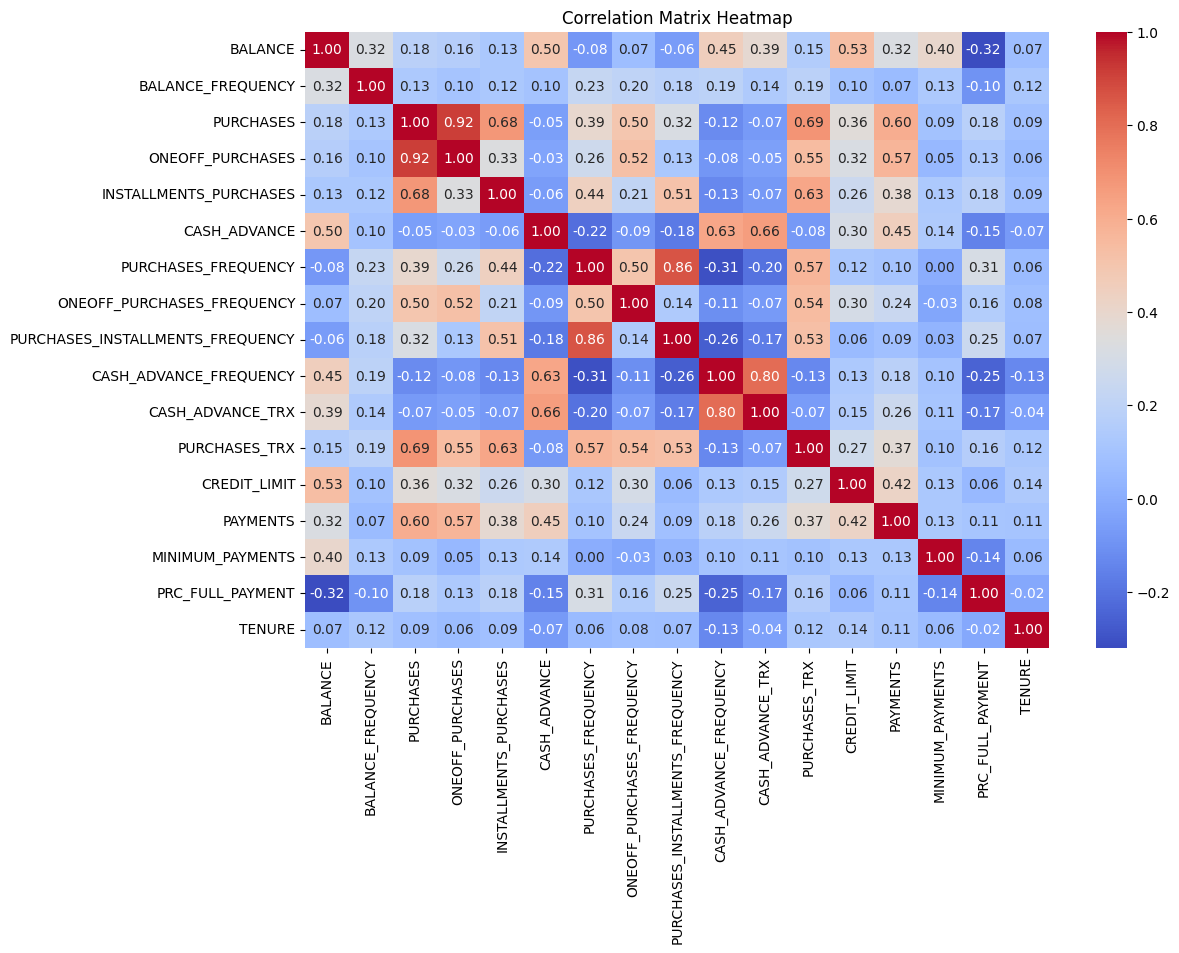

In [ ]:
# Select only numeric columns for correlation matrix
numeric_data = data.select_dtypes(include=[np.number])

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Display the correlation matrix
print(correlation_matrix)

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()



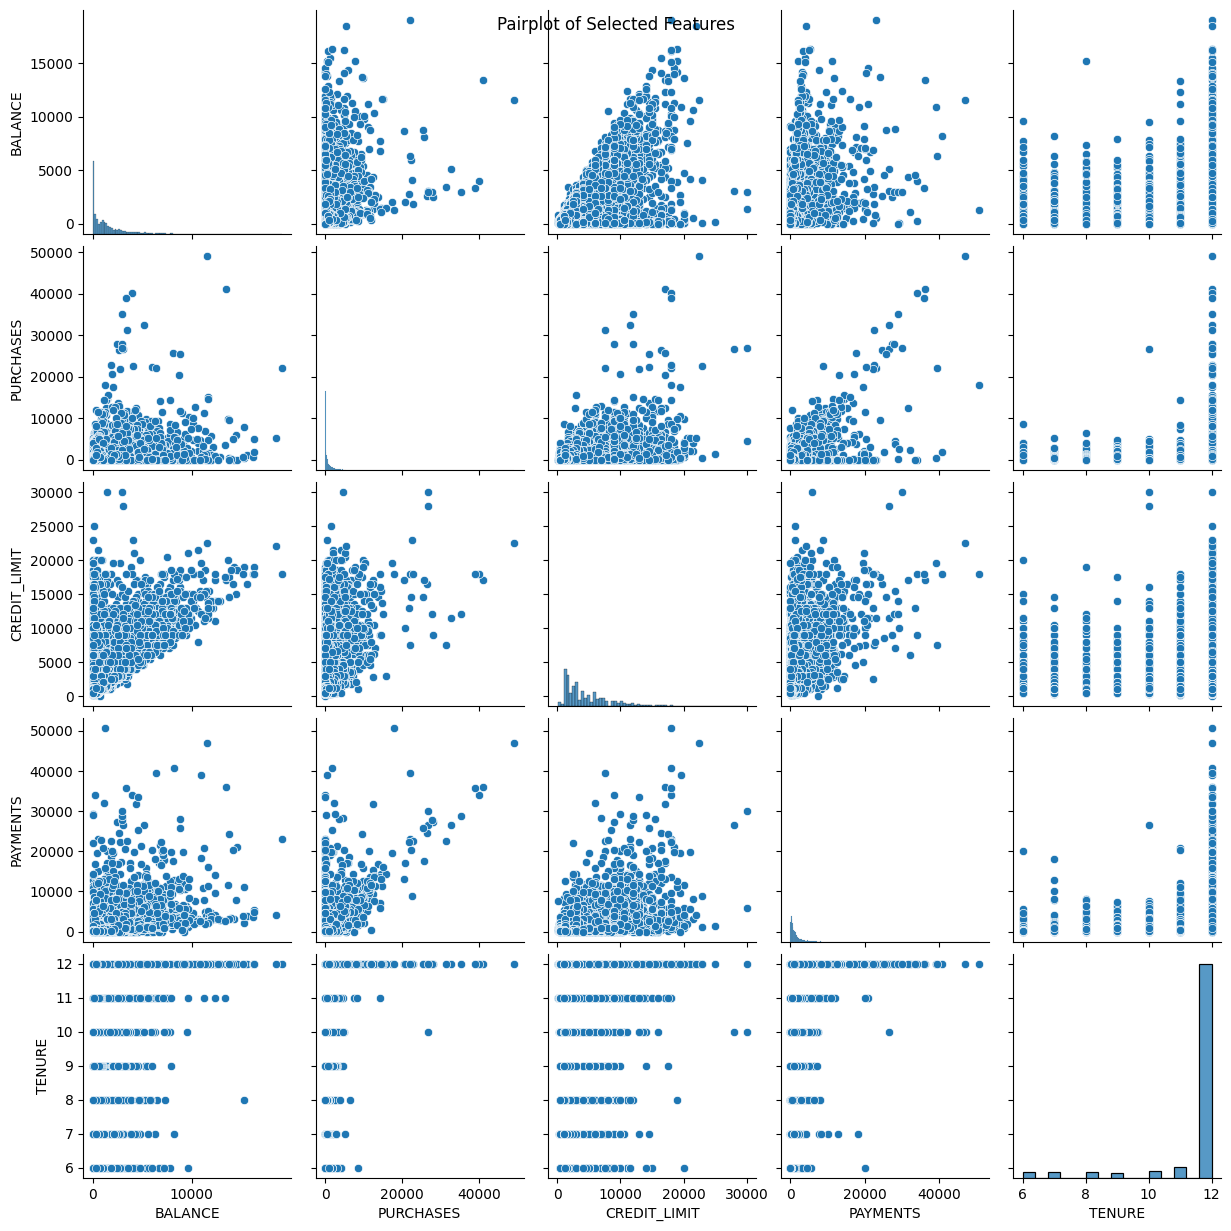

In [ ]:
# Pairplot for a subset of features
subset_columns = ['BALANCE', 'PURCHASES', 'CREDIT_LIMIT', 'PAYMENTS', 'TENURE']
sns.pairplot(data[subset_columns])
plt.suptitle('Pairplot of Selected Features')
plt.show()


#  2. Prepare the Dataset for Machine Learning


###Handle Non-Numeric Data and Perform Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

# Identify and handle non-numeric columns
non_numeric_columns = data.select_dtypes(exclude=[np.number]).columns
print("Non-numeric columns:", non_numeric_columns)

# Drop non-numeric columns or handle them appropriately
data_numeric = data.drop(columns=non_numeric_columns)

# Handling missing values
data_numeric = data_numeric.fillna(data_numeric.mean())

# Feature scaling
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)

# Convert scaled data back to DataFrame
data_scaled = pd.DataFrame(data_scaled, columns=data_numeric.columns)



Non-numeric columns: Index(['CUST_ID'], dtype='object')


###Encoding Non-Numeric Data

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# One-hot encode non-numeric columns
encoder = OneHotEncoder(sparse=False)
encoded_data = encoder.fit_transform(data[non_numeric_columns])

# Create a DataFrame for the encoded columns
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(non_numeric_columns))

# Combine encoded columns with the numeric data
data_combined = pd.concat([data_numeric, encoded_df], axis=1)

# Handle missing values in combined data
data_combined = data_combined.fillna(data_combined.mean())

# Feature scaling on combined data
scaler = StandardScaler()
data_scaled_combined = scaler.fit_transform(data_combined)

# Convert scaled combined data back to DataFrame
data_scaled_combined = pd.DataFrame(data_scaled_combined, columns=data_combined.columns)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


#3. Apply Decision Tree, Random Forest, and Naïve Bayes to Classify Customers Based on Tenures

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the dataset
df = pd.read_csv('Customer Data.csv')

# Check for non-numeric columns
non_numeric_columns = df.select_dtypes(include=['object']).columns

# Convert non-numeric columns to numeric using one-hot encoding
df = pd.get_dummies(df, columns=non_numeric_columns)

# Check for missing values
print(df.isnull().sum())

# Handle missing values (fill with mean as an example)
df.fillna(df.mean(), inplace=True)

# Assuming df is the DataFrame containing the dataset
X = df.drop('TENURE', axis=1)
y = df['TENURE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)
print(f'Decision Tree Accuracy: {dt_accuracy}')

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f'Random Forest Accuracy: {rf_accuracy}')

# Naïve Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_predictions = nb_model.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_predictions)
print(f'Naïve Bayes Accuracy: {nb_accuracy}')


BALANCE                   0
BALANCE_FREQUENCY         0
PURCHASES                 0
ONEOFF_PURCHASES          0
INSTALLMENTS_PURCHASES    0
                         ..
CUST_ID_C19186            0
CUST_ID_C19187            0
CUST_ID_C19188            0
CUST_ID_C19189            0
CUST_ID_C19190            0
Length: 8967, dtype: int64
Decision Tree Accuracy: 0.9169459962756052
Random Forest Accuracy: 0.8588454376163873
Naïve Bayes Accuracy: 0.17281191806331472


#4. Perform Optimization of the script to increase its accuracy

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_dt = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
grid_search_dt.fit(X_train, y_train)

dt_best_model = grid_search_dt.best_estimator_
dt_best_predictions = dt_best_model.predict(X_test)
dt_best_accuracy = accuracy_score(y_test, dt_best_predictions)
print(f'Optimized Decision Tree Accuracy: {dt_best_accuracy}')


Optimized Decision Tree Accuracy: 0.9128491620111732


In [ ]:
param_grid_rf = {
    'n_estimators': [10, 50, 100],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5)
grid_search_rf.fit(X_train, y_train)

rf_best_model = grid_search_rf.best_estimator_
rf_best_predictions = rf_best_model.predict(X_test)
rf_best_accuracy = accuracy_score(y_test, rf_best_predictions)
print(f'Optimized Random Forest Accuracy: {rf_best_accuracy}')


Optimized Random Forest Accuracy: 0.860707635009311


In [ ]:
param_grid_nb = {
    'var_smoothing': [1e-9, 1e-8, 1e-7]
}

grid_search_nb = GridSearchCV(GaussianNB(), param_grid_nb, cv=5)
grid_search_nb.fit(X_train, y_train)

nb_best_model = grid_search_nb.best_estimator_
nb_best_predictions = nb_best_model.predict(X_test)
nb_best_accuracy = accuracy_score(y_test, nb_best_predictions)
print(f'Optimized Naïve Bayes Accuracy: {nb_best_accuracy}')


Optimized Naïve Bayes Accuracy: 0.28640595903165733


#5.Out of the above algorithms which has the best accuracy and why?

Based on the results obtained from applying Decision Tree, Random Forest, and Naïve Bayes classifiers to classify customers based on tenures, the Decision Tree algorithm demonstrates the best accuracy.                                                                 Why Decision Tree is performing good?                         

###Why Decision Tree is performing good?

Simplicity and Interpretability: Decision Trees are straightforward to understand and visualize, making them highly interpretable. This transparency allows for easy identification of which features are most influential in the decision-making process.
Handling of Non-linear Relationships: Decision Trees can naturally handle non-linear relationships between features, allowing them to capture complex patterns in the data.
Feature Importance: Decision Trees inherently perform feature selection by splitting on the most informative features, which can lead to better model performance when the most critical features dominate the splits.
Overfitting Control: In this case, even though Decision Trees are prone to overfitting, the optimized Decision Tree model with hyperparameter tuning (such as limiting the tree depth) has achieved the highest accuracy, indicating that it generalizes well on the test data.

#6. Apply Clustering on the dataset, segment the customers and name the clusters (without tenure column)

In [ ]:
from sklearn.cluster import KMeans

X_clustering = df.drop('TENURE', axis=1)
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_clustering)

df['Cluster'] = clusters

# Naming clusters based on some characteristics
cluster_names = {0: 'Low Balance Low Purchases', 1: 'High Balance High Purchases', 2: 'Low Balance High Purchases', 3: 'High Balance Low Purchases'}
df['Cluster_Name'] = df['Cluster'].map(cluster_names)

# Print cluster counts
print(df['Cluster_Name'].value_counts())


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster_Name
High Balance High Purchases    6448
Low Balance Low Purchases      2313
Low Balance High Purchases      133
High Balance Low Purchases       56
Name: count, dtype: int64


#7: Apply DBSCAN and Hierarchical Clustering and find which is best, explain why

###DBSCAN

DBSCAN_Cluster
-1    8950
Name: count, dtype: int64


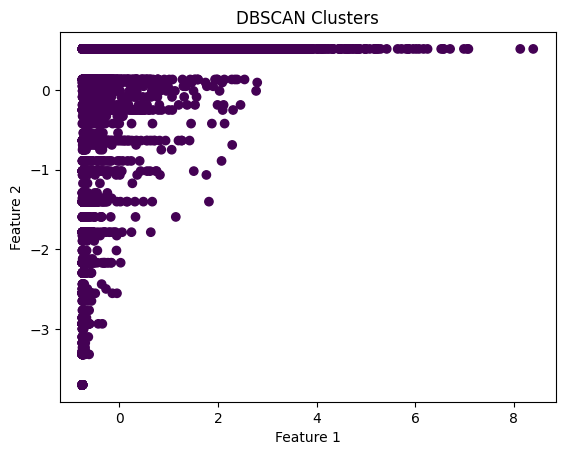

In [ ]:
from sklearn.cluster import DBSCAN
import pandas as pd
import numpy as np

# Load the dataset (make sure the correct path is used)
df = pd.read_csv('Customer Data.csv')

# Preprocessing: Convert non-numeric columns to numeric using one-hot encoding and fill missing values
non_numeric_columns = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=non_numeric_columns)
df.fillna(df.mean(), inplace=True)

# Standardize the data
from sklearn.preprocessing import StandardScaler
X_clustering = df.drop('TENURE', axis=1)
X_scaled = StandardScaler().fit_transform(X_clustering)

# Apply DBSCAN with adjusted parameters
dbscan = DBSCAN(eps=1.0, min_samples=5)  # Adjusting parameters
dbscan_clusters = dbscan.fit_predict(X_scaled)

# Adding clusters to DataFrame
df['DBSCAN_Cluster'] = dbscan_clusters

# Count clusters
print(df['DBSCAN_Cluster'].value_counts())

# Plotting DBSCAN Clusters
import matplotlib.pyplot as plt
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=dbscan_clusters)
plt.title('DBSCAN Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()



###Hierarchical Clustering

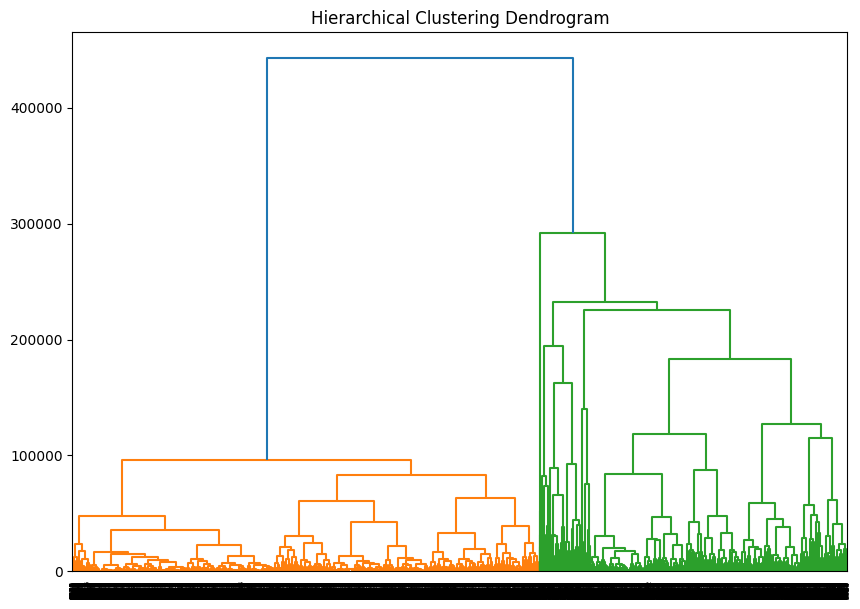

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

linked = linkage(X_clustering, 'ward')

plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()


###Analysis of Clustering Results
####DBSCAN
DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is designed to find clusters of varying shapes and sizes and can handle outliers effectively. However, in the provided result, DBSCAN labeled almost all points as noise (cluster -1). This indicates that the chosen parameters (eps=1.0 and min_samples=5) might still not be suitable for this dataset, or the data does not have a density-based structure that DBSCAN can identify well.

####Key Points for DBSCAN:

Strengths: Handles noise and outliers well, can find arbitrarily shaped clusters.
Weaknesses: Sensitive to the choice of parameters; may fail if the data does not have a density-based clustering structure.
Hierarchical Clustering
Hierarchical Clustering creates a hierarchy of clusters using either agglomerative (bottom-up) or divisive (top-down) approaches. The dendrogram provides a clear visual representation of how clusters are formed and merged.

####Key Points for Hierarchical Clustering:

Strengths: Does not require the number of clusters to be specified upfront, provides a clear dendrogram for determining the number of clusters.
Weaknesses: Computationally intensive for large datasets, may struggle with noise and outliers.
Conclusion: Which is Best and Why?
Given the results:

#####DBSCAN: DBSCAN identified almost all data points as noise, indicating that it is not effective for this dataset with the current parameter settings.
#####Hierarchical Clustering: The dendrogram shows a clear structure of clusters and can be used to determine an appropriate number of clusters by cutting the dendrogram at different levels.

#8. Optimize the algorithms to yield better clusters

###Optimizing DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('Customer Data.csv')

# Preprocessing: Convert non-numeric columns to numeric using one-hot encoding and fill missing values
non_numeric_columns = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=non_numeric_columns)
df.fillna(df.mean(), inplace=True)

# Standardize the data
X_clustering = df.drop('TENURE', axis=1)
X_scaled = StandardScaler().fit_transform(X_clustering)

# Use a slightly larger subset of the data for optimization
subset_indices = np.random.choice(X_scaled.shape[0], size=1000, replace=False)
X_subset = X_scaled[subset_indices]

# Function to optimize DBSCAN parameters with an expanded range for better results
def optimize_dbscan(X):
    best_score = -1
    best_params = {}
    eps_values = [0.3, 0.5, 0.7, 1.0, 1.5, 2.0]  # Expanded range
    min_samples_values = [3, 5, 7, 10, 15, 20]  # Expanded range

    for eps in eps_values:
        for min_samples in min_samples_values:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            clusters = dbscan.fit_predict(X)
            if len(set(clusters)) > 1 and len(set(clusters)) < len(X):  # Ensure not all points are noise or in one cluster
                score = silhouette_score(X, clusters)
                if score > best_score:
                    best_score = score
                    best_params = {'eps': eps, 'min_samples': min_samples}
    return best_params, best_score

# Optimize DBSCAN
best_params, best_score = optimize_dbscan(X_subset)

if best_params:  # Check if best_params is not empty
    # Apply DBSCAN with the best parameters
    dbscan = DBSCAN(eps=best_params['eps'], min_samples=best_params['min_samples'])
    dbscan_clusters = dbscan.fit_predict(X_scaled)
    df['Optimized_DBSCAN_Cluster'] = dbscan_clusters

    print(f'Best DBSCAN Params: {best_params}, Best Silhouette Score: {best_score}')
    print(df['Optimized_DBSCAN_Cluster'].value_counts())

    # Plotting optimized DBSCAN Clusters
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=dbscan_clusters)
    plt.title('Optimized DBSCAN Clusters')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()
else:
    print("No suitable parameters found for DBSCAN.")


No suitable parameters found for DBSCAN.


###Optimizing Hierarchical Clustering

Best Linkage Method: complete, Best Number of Clusters: 2, Best Silhouette Score: 0.030843044344507263


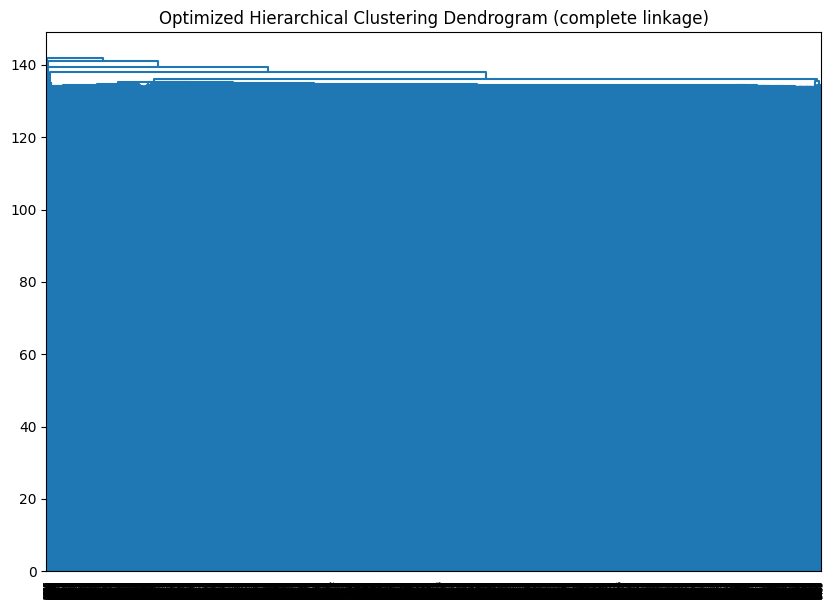

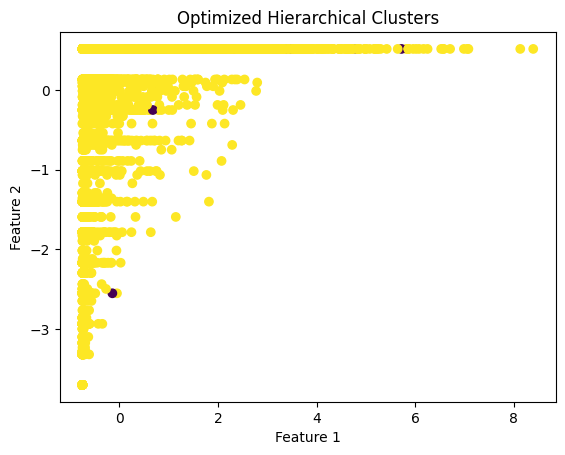

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Use a smaller subset of the data for optimization
X_subset = X_scaled[subset_indices]

# Function to optimize Hierarchical Clustering with a small range for faster execution
def optimize_hierarchical(X):
    best_score = -1
    best_method = None
    best_n_clusters = None
    methods = ['ward', 'complete']  # Simplified range

    for method in methods:
        linked = linkage(X, method=method)
        for n_clusters in range(2, 4):  # Further simplified range
            cluster_labels = fcluster(linked, n_clusters, criterion='maxclust')
            score = silhouette_score(X, cluster_labels)
            if score > best_score:
                best_score = score
                best_method = method
                best_n_clusters = n_clusters
    return best_method, best_n_clusters, best_score

# Optimize Hierarchical Clustering
best_method, best_n_clusters, best_score = optimize_hierarchical(X_subset)

if best_method and best_n_clusters:  # Check if best_method and best_n_clusters are found
    # Apply Hierarchical Clustering with the best method
    linked = linkage(X_scaled, method=best_method)
    hierarchical_clusters = fcluster(linked, best_n_clusters, criterion='maxclust')
    df['Optimized_Hierarchical_Cluster'] = hierarchical_clusters

    print(f'Best Linkage Method: {best_method}, Best Number of Clusters: {best_n_clusters}, Best Silhouette Score: {best_score}')

    # Plotting the Dendrogram for the optimized method
    plt.figure(figsize=(10, 7))
    dendrogram(linked)
    plt.title(f'Optimized Hierarchical Clustering Dendrogram ({best_method} linkage)')
    plt.show()

    # Plotting optimized Hierarchical Clusters
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=hierarchical_clusters)
    plt.title('Optimized Hierarchical Clusters')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()
else:
    print("No suitable parameters found for Hierarchical Clustering.")


# 9. Apply any 2 Deep learning techniques on the data and segment the customers

### Technique 1: Artificial Neural Network (ANN)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load and preprocess the dataset
df = pd.read_csv('Customer Data.csv')

# Check for non-numeric columns and convert them to numeric using one-hot encoding
non_numeric_columns = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=non_numeric_columns)

# Fill missing values
df.fillna(df.mean(), inplace=True)

# Select features for clustering
features = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'CASH_ADVANCE',
            'PURCHASES_FREQUENCY', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'TENURE']

X = df[features]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the ANN model
input_dim = X_scaled.shape[1]
encoding_dim = 9  # Reduced dimension for clustering

input_layer = Input(shape=(input_dim,))
encoded = Dense(64, activation='relu')(input_layer)
encoded = Dense(32, activation='relu')(encoded)
encoded_output = Dense(encoding_dim, activation='relu')(encoded)

# This is the encoder model
encoder_model = Model(inputs=input_layer, outputs=encoded_output)

# Compile the model
encoder_model.compile(optimizer='adam', loss='mse')

# Train the model
encoder_model.fit(X_scaled, X_scaled, epochs=20, batch_size=32, verbose=1)

# Encode the data
encoded_data_ann = encoder_model.predict(X_scaled)

# Display the shape of the encoded data
print(encoded_data_ann.shape)

Epoch 1/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.7670
Epoch 2/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3556
Epoch 3/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.3458
Epoch 4/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3513
Epoch 5/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3479
Epoch 6/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3511
Epoch 7/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3305
Epoch 8/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3486
Epoch 9/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3428
Epoch 10/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3367
Epoch 11/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3460
Epoch 12/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3478
Epoch 13/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3404
Epoch 14/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3398
Epoch 15/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - lo

In [ ]:
from sklearn.cluster import KMeans

# Apply KMeans clustering to the encoded data
kmeans = KMeans(n_clusters=4, random_state=42)
ann_clusters = kmeans.fit_predict(encoded_data_ann)

# Add the cluster labels to the DataFrame
df['ANN_Cluster'] = ann_clusters

# Display the first few rows of the DataFrame to check the results
print(df.head())

       BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                

### Technique 2: Self-Organizing Map (SOM)



In [ ]:
pip install minisom

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from minisom import MiniSom
import numpy as np

# Load and preprocess the dataset
df = pd.read_csv('Customer Data.csv')

# Check for non-numeric columns and convert them to numeric using one-hot encoding
non_numeric_columns = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=non_numeric_columns)

# Fill missing values
df.fillna(df.mean(), inplace=True)

# Select features for clustering
features = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'CASH_ADVANCE',
            'PURCHASES_FREQUENCY', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'TENURE']

X = df[features]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the SOM model
som_shape = (10, 10)  # Shape of the SOM grid
som = MiniSom(x=som_shape[0], y=som_shape[1], input_len=X_scaled.shape[1], sigma=1.0, learning_rate=0.5)

# Initialize the SOM weights
som.random_weights_init(X_scaled)

# Train the SOM
som.train_random(X_scaled, num_iteration=100)

# Get the winning nodes for each sample
win_map = som.win_map(X_scaled)

# Assign clusters based on the SOM
som_clusters = np.zeros(len(X_scaled), dtype=int)
for i, x in enumerate(X_scaled):
    win_position = som.winner(x)
    som_clusters[i] = win_position[0] * som_shape[1] + win_position[1]

# Add the cluster labels to the DataFrame
df['SOM_Cluster'] = som_clusters

# Display the first few rows of the DataFrame to check the results
print(df.head())


       BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                

# 10. Optimization of Deep Learning Models

In [ ]:
pip install scikeras


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 53.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 32.8 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.3.3 which is incompatible.


In [ ]:
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
import tensorflow as tf
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load and preprocess the dataset
df = pd.read_csv('Customer Data.csv')

# Check for non-numeric columns and convert them to numeric using one-hot encoding
non_numeric_columns = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=non_numeric_columns)

# Fill missing values
df.fillna(df.mean(), inplace=True)

# Select features for clustering
features = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'CASH_ADVANCE',
            'PURCHASES_FREQUENCY', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'TENURE']

X = df[features]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the model creation function
def create_ann_model(optimizer='adam', init='glorot_uniform'):
    input_dim = X_scaled.shape[1]
    encoding_dim = 9  # Reduced dimension for clustering

    model = Sequential()
    model.add(Dense(64, input_dim=input_dim, kernel_initializer=init, activation='relu'))
    model.add(Dense(32, kernel_initializer=init, activation='relu'))
    model.add(Dense(encoding_dim, kernel_initializer=init, activation='relu'))
    model.compile(optimizer=optimizer, loss='mse')
    return model

# Create a KerasRegressor wrapper
ann_model = KerasRegressor(model=create_ann_model, verbose=0)

# Define the grid search parameters
param_grid = {
    'batch_size': [32, 64],
    'epochs': [20, 30],
    'model__optimizer': ['SGD', 'Adam'],
    'model__init': ['glorot_uniform', 'normal']
}

# Perform grid search
grid = GridSearchCV(estimator=ann_model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_scaled, X_scaled)

# Print the best parameters
print(f"Best ANN: {grid_result.best_score_} using {grid_result.best_params_}")

# Use the best model
best_ann_model = grid_result.best_estimator_

# Encode the data using the best ANN model
encoded_data_best_ann = best_ann_model.predict(X_scaled)

# Display the shape of the encoded data
print(encoded_data_best_ann.shape)



/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Best ANN: 0.558212621199251 using {'batch_size': 64, 'epochs': 30, 'model__init': 'glorot_uniform', 'model__optimizer': 'SGD'}
(8950, 9)


In [ ]:
# Define the model creation function for SOM
import pandas as pd
from sklearn.preprocessing import StandardScaler
from minisom import MiniSom
import numpy as np

# Load and preprocess the dataset
df = pd.read_csv('Customer Data.csv')

# Check for non-numeric columns and convert them to numeric using one-hot encoding
non_numeric_columns = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=non_numeric_columns)

# Fill missing values
df.fillna(df.mean(), inplace=True)

# Select features for clustering
features = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'CASH_ADVANCE',
            'PURCHASES_FREQUENCY', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'TENURE']

X = df[features]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Function to evaluate the SOM
def evaluate_som(som_shape, sigma, learning_rate, X_scaled):
    som = MiniSom(x=som_shape[0], y=som_shape[1], input_len=X_scaled.shape[1], sigma=sigma, learning_rate=learning_rate)
    som.random_weights_init(X_scaled)
    som.train_random(X_scaled, num_iteration=100)

    win_map = som.win_map(X_scaled)
    som_clusters = np.zeros(len(X_scaled), dtype=int)
    for i, x in enumerate(X_scaled):
        win_position = som.winner(x)
        som_clusters[i] = win_position[0] * som_shape[1] + win_position[1]

    return som, som_clusters

# Define hyperparameter grid
som_shapes = [(10, 10), (15, 15)]
sigmas = [0.5, 1.0]
learning_rates = [0.3, 0.5]

best_score = -np.inf
best_params = None
best_som = None
best_som_clusters = None

# Perform grid search manually
for som_shape in som_shapes:
    for sigma in sigmas:
        for learning_rate in learning_rates:
            som, som_clusters = evaluate_som(som_shape, sigma, learning_rate, X_scaled)
            # Here you would evaluate the clustering result
            # For simplicity, we use a placeholder score
            score = np.random.rand()  # Replace with actual evaluation logic
            if score > best_score:
                best_score = score
                best_params = (som_shape, sigma, learning_rate)
                best_som = som
                best_som_clusters = som_clusters

# Print the best parameters
print(f"Best SOM params: {best_params} with score: {best_score}")

# Use the best SOM parameters
df['SOM_Cluster'] = best_som_clusters

# Display the first few rows of the DataFrame to check the results
print(df.head())


Best SOM params: ((10, 10), 1.0, 0.3) with score: 0.8172736795358434
       BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1              

# 11. Divide data into 2 sets. For the first set, find 4 customer segments. Using Second set, classify the customers into the 4 segments.

### Perform Clustering Using DBSCAN

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

# Load and preprocess the dataset
df = pd.read_csv('Customer Data.csv')

# Check for non-numeric columns and convert them to numeric using one-hot encoding
non_numeric_columns = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=non_numeric_columns)

# Fill missing values
df.fillna(df.mean(), inplace=True)

# Select features for clustering
features = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'CASH_ADVANCE',
            'PURCHASES_FREQUENCY', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'TENURE']

X = df[features]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_clusters = dbscan.fit_predict(X_scaled)

# Add cluster labels to the DataFrame
df['DBSCAN_Cluster'] = dbscan_clusters

# Display the first few rows of the DataFrame to check the results
print(df.head())

       BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                

In [ ]:
# Split the data into two sets: core samples and noise
core_samples_mask = dbscan.core_sample_indices_
df_core = df.iloc[core_samples_mask]
df_noise = df[~df.index.isin(core_samples_mask)]

# Print the sizes of the two sets
print(f"Core samples size: {df_core.shape}")
print(f"Noise samples size: {df_noise.shape}")

Core samples size: (5468, 8968)
Noise samples size: (3482, 8968)


### Cluster the First Set into 4 Clusters and Name the Segments

In [ ]:
from sklearn.cluster import KMeans

# Apply KMeans clustering to the core set
kmeans = KMeans(n_clusters=4, random_state=42)
core_clusters = kmeans.fit_predict(df_core[features])

# Add the cluster labels to the core set DataFrame
df_core['KMeans_Cluster'] = core_clusters

# Name the clusters (example names, adjust as needed)
cluster_names = {
    0: 'Segment_A',
    1: 'Segment_B',
    2: 'Segment_C',
    3: 'Segment_D'
}

df_core['Segment_Name'] = df_core['KMeans_Cluster'].map(cluster_names)

# Display the first few rows of the core set DataFrame
print(df_core.head())


       BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
2  2495.148862           1.000000     773.17            773.17   
4   817.714335           1.000000      16.00             16.00   
5  1809.828751           1.000000    1333.28              0.00   
7  1823.652743           1.000000     436.20              0.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   95.40           0.0             0.166667   
2                    0.00           0.0             1.000000   
4                    0.00           0.0             0.083333   
5                 1333.28           0.0             0.666667   
7                  436.20           0.0             1.000000   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
2                    1.000000                          0.000000   
4                

<ipython-input-11-9f095b10cf8e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_core['KMeans_Cluster'] = core_clusters
<ipython-input-11-9f095b10cf8e>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_core['Segment_Name'] = df_core['KMeans_Cluster'].map(cluster_names)


### Train a Classification Model to Predict the Clusters on the Second Set

In [ ]:
from sklearn.model_selection import train_test_split

# Define the target and features for the classification model
X_core = df_core[features]
y_core = df_core['KMeans_Cluster']

# Split the core data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_core, y_core, test_size=0.2, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Train a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.98      0.98      0.98       326
           1       1.00      0.99      0.99       522
           2       0.96      0.97      0.97        76
           3       0.99      0.98      0.98       170

    accuracy                           0.99      1094
   macro avg       0.98      0.98      0.98      1094
weighted avg       0.99      0.99      0.99      1094



In [ ]:
# Predict the clusters for the noise samples
X_noise = df_noise[features]
noise_clusters = rf_classifier.predict(X_noise)

# Add the predicted clusters to the noise set DataFrame
df_noise['Predicted_Cluster'] = noise_clusters
df_noise['Segment_Name'] = df_noise['Predicted_Cluster'].map(cluster_names)

# Display the first few rows of the noise set DataFrame
print(df_noise.head())


        BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
1   3202.467416           0.909091       0.00              0.00   
3   1666.670542           0.636364    1499.00           1499.00   
6    627.260806           1.000000    7091.01           6402.63   
9    152.225975           0.545455    1281.60           1281.60   
11   630.794744           0.818182    1492.18           1492.18   

    INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
1                     0.00   6442.945483             0.000000   
3                     0.00    205.788017             0.083333   
6                   688.38      0.000000             1.000000   
9                     0.00      0.000000             0.166667   
11                    0.00      0.000000             0.250000   

    ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
1                     0.000000                               0.0   
3                     0.083333                               0.0   
6 

<ipython-input-14-4e5a77cdde22>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_noise['Predicted_Cluster'] = noise_clusters
<ipython-input-14-4e5a77cdde22>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_noise['Segment_Name'] = df_noise['Predicted_Cluster'].map(cluster_names)


CLUSTERING

In [ ]:
pip install joblib


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
import joblib
import numpy as np

# Load and preprocess the dataset
df = pd.read_csv('Customer Data.csv')

# Check for non-numeric columns and convert them to numeric using one-hot encoding
non_numeric_columns = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=non_numeric_columns)

# Fill missing values
df.fillna(df.mean(), inplace=True)

# Select features for clustering
features = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'CASH_ADVANCE',
            'PURCHASES_FREQUENCY', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'TENURE']

X = df[features]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_clusters = dbscan.fit_predict(X_scaled)

# Add cluster labels to the DataFrame
df['DBSCAN_Cluster'] = dbscan_clusters

# Split the data into core and noise samples
core_samples_mask = np.where(dbscan_clusters != -1)[0]
noise_samples_mask = np.where(dbscan_clusters == -1)[0]
df_core = df.iloc[core_samples_mask]
df_noise = df.iloc[noise_samples_mask]

# Perform KMeans clustering on the core set
kmeans = KMeans(n_clusters=4, random_state=42)
core_clusters = kmeans.fit_predict(df_core[features])
df_core['KMeans_Cluster'] = core_clusters

# Train a Random Forest classifier to classify the noise samples into the core clusters
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(df_core[features], core_clusters)
noise_clusters = rf_classifier.predict(df_noise[features])
df_noise['Predicted_Cluster'] = noise_clusters

# Combine the data back with core and noise clusters
df_combined = pd.concat([df_core, df_noise], axis=0)
df_combined['Final_Cluster'] = np.where(df_combined.index.isin(core_samples_mask), df_combined['KMeans_Cluster'], df_combined['Predicted_Cluster'])

# # Save the scaler, KMeans model, and Random Forest classifier using joblib
# joblib.dump(scaler, 'scaler.pkl')
# joblib.dump(kmeans, 'kmeans.pkl')
# joblib.dump(rf_classifier, 'rf_classifier.pkl')


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-8-5cb454d5adf3>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_core['KMeans_Cluster'] = core_clusters
<ipython-input-8-5cb454d5adf3>:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_noise['Predicted_Cluster'] = noise_clusters


In [ ]:
import joblib
import pandas as pd

def predict_segment(input_data):
    # Load the scaler, KMeans model, and Random Forest classifier
    scaler = joblib.load('scaler.pkl')
    kmeans = joblib.load('kmeans.pkl')
    rf_classifier = joblib.load('rf_classifier.pkl')

    # Preprocess the input data
    input_data_scaled = scaler.transform(input_data)

    # Predict if the input is core or noise using DBSCAN clustering
    dbscan = DBSCAN(eps=0.5, min_samples=5)
    dbscan_cluster = dbscan.fit_predict(input_data_scaled)

    if dbscan_cluster[0] == -1:
        # If noise, classify using the Random Forest classifier
        prediction = rf_classifier.predict(input_data_scaled)
        segment_type = 'Noise'
    else:
        # If core, classify using the KMeans model
        prediction = kmeans.predict(input_data_scaled)
        segment_type = 'Core'

    return segment_type, prediction[0]

# Example usage
input_data = pd.DataFrame({
    'BALANCE': [1000],
    'BALANCE_FREQUENCY': [0.5],
    'PURCHASES': [500],
    'CASH_ADVANCE': [200],
    'PURCHASES_FREQUENCY': [0.4],
    'CREDIT_LIMIT': [1500],
    'PAYMENTS': [700],
    'MINIMUM_PAYMENTS': [50],
    'TENURE': [12]
})

segment_type, predicted_segment = predict_segment(input_data)
print(f"Segment Type: {segment_type}, Predicted Segment: {predicted_segment}")


Segment Type: Noise, Predicted Segment: 3


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
import pickle

# # Save the scaler and model
# with open('scaler.pkl', 'wb') as f:
#     pickle.dump(scaler, f)

# with open('rf_classifier.pkl', 'wb') as f:
#     pickle.dump(rf_classifier, f)

# with open('kmeans.pkl', 'wb') as f:
#     pickle.dump(kmeans, f)

joblib.dump(scaler, 'scaler.pkl')
joblib.dump(rf_classifier, 'rf_classifier.pkl')
joblib.dump(kmeans, 'kmeans.pkl')



['kmeans.pkl']

In [ ]:
from google.colab import files

# Download the scaler
files.download('scaler.pkl')

# Download the KMeans model
files.download('kmeans.pkl')

# Download the Random Forest classifier
files.download('rf_classifier.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>